##Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Checking for null values

In [ ]:
dataset= pd.read_csv("Obesity prediction.csv")
#Checkig for NaN values in the given dataset
dataset.replace(["", "NA", "null"], np.nan, inplace=True)
print(dataset.isnull().sum())


Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64


##Dependant and Independant Variables

In [ ]:
x= dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
print(x)
print()
print(y)
print("Original y values:", dataset.iloc[:, -1].unique())

[['Female' 21.0 1.62 ... 1.0 'no' 'Public_Transportation']
 ['Female' 21.0 1.52 ... 0.0 'Sometimes' 'Public_Transportation']
 ['Male' 23.0 1.8 ... 1.0 'Frequently' 'Public_Transportation']
 ...
 ['Female' 22.524036 1.752206 ... 0.646288 'Sometimes'
  'Public_Transportation']
 ['Female' 24.361936 1.73945 ... 0.586035 'Sometimes'
  'Public_Transportation']
 ['Female' 23.664709 1.738836 ... 0.714137 'Sometimes'
  'Public_Transportation']]

['Normal_Weight' 'Normal_Weight' 'Normal_Weight' ... 'Obesity_Type_III'
 'Obesity_Type_III' 'Obesity_Type_III']
Original y values: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


<ipython-input-4-4b5dd04853bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset.iloc[:,-1], palette="coolwarm")


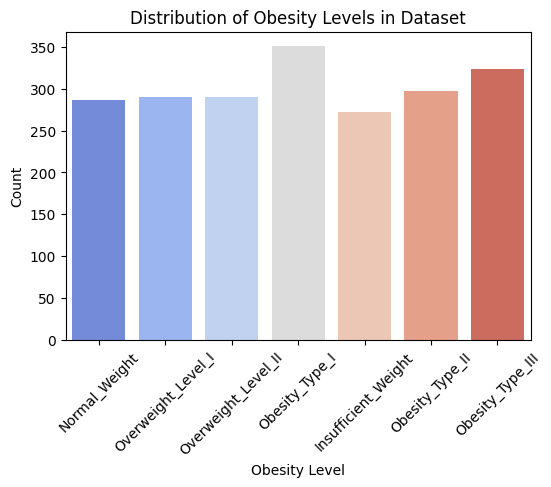

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x=dataset.iloc[:,-1], palette="coolwarm")
plt.xlabel("Obesity Level")
plt.ylabel("Count")
plt.title("Distribution of Obesity Levels in Dataset")
plt.xticks(rotation=45)
plt.show()


##Encoding Categorical Data (One-Hot Encoding)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_columns=[0,4,5,9,11,15]
ct1= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),cat_columns)],remainder='passthrough')
x=np.array(ct1.fit_transform(x))
print(x[:10])
print(y[:10])


[[1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 21.0 1.62
  64.0 2.0 3.0 'Sometimes' 2.0 0.0 1.0 'no']
 [1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 21.0 1.52
  56.0 3.0 3.0 'Sometimes' 3.0 3.0 0.0 'Sometimes']
 [0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 23.0 1.8
  77.0 2.0 3.0 'Sometimes' 2.0 2.0 1.0 'Frequently']
 [0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 27.0 1.8
  87.0 3.0 3.0 'Sometimes' 2.0 2.0 0.0 'Frequently']
 [0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 22.0 1.78
  89.8 2.0 1.0 'Sometimes' 2.0 0.0 0.0 'Sometimes']
 [0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 29.0 1.62
  53.0 2.0 3.0 'Sometimes' 2.0 0.0 0.0 'Sometimes']
 [1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 23.0 1.5
  55.0 3.0 3.0 'Sometimes' 2.0 1.0 0.0 'Sometimes']
 [0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 22.0 1.64
  53.0 2.0 3.0 'Sometimes' 2.0 3.0 0.0 'Sometimes']
 [0.0 1.0 0.0 1.

##Encoding Categorical Data (Label Encoding)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
x[:,-1]=le.fit_transform(x[:,-1])
x[:,-5]=le.fit_transform(x[:,-5])
print(x[:15])
print(y[:15])

[[1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 21.0 1.62
  64.0 2.0 3.0 2 2.0 0.0 1.0 3]
 [1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 21.0 1.52
  56.0 3.0 3.0 2 3.0 3.0 0.0 2]
 [0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 23.0 1.8
  77.0 2.0 3.0 2 2.0 2.0 1.0 1]
 [0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 27.0 1.8
  87.0 3.0 3.0 2 2.0 2.0 0.0 1]
 [0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 22.0 1.78
  89.8 2.0 1.0 2 2.0 0.0 0.0 2]
 [0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 29.0 1.62
  53.0 2.0 3.0 2 2.0 0.0 0.0 2]
 [1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 23.0 1.5
  55.0 3.0 3.0 2 2.0 1.0 0.0 2]
 [0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 22.0 1.64
  53.0 2.0 3.0 2 2.0 3.0 0.0 2]
 [0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 24.0 1.78
  64.0 3.0 3.0 2 2.0 1.0 1.0 1]
 [0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 22.0 

In [ ]:
from sklearn.preprocessing import LabelEncoder
print(y)
le1= LabelEncoder()
le1.fit(y)
y=le1.fit_transform(y)
print(y[:15])



[1 1 1 ... 4 4 4]
[1 1 1 5 6 1 1 1 1 1 2 6 1 2 1]


##Splitting the data for training and test purpose

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=0)

print(x_train[:15])
print()
print(x_test[:15])
print()
print(y_train[:15])
print()
print(y_test[:15])

[[1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 21.330178
  1.747987 147.296186 3.0 3.0 2 2.336349 1.4164 0.711724 2]
 [1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 22.0 1.5
  49.0 2.0 1.0 2 2.0 3.0 0.0 3]
 [0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 22.185756
  1.784555 89.836692 1.979944 1.599464 2 2.0 0.17048 0.819475 2]
 [1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 23.365041
  1.744319 133.45249 3.0 3.0 2 2.839069 1.231031 0.792496 2]
 [0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 33.749594
  1.701387 107.025415 2.561638 2.87747 2 1.0 1.980401 0.0 3]
 [0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 23.0 1.67
  85.5 2.0 3.0 0 2.0 0.0 1.0 3]
 [0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 24.751511
  1.735343 83.337721 2.607335 3.0 2 2.0 0.451009 0.630866 2]
 [0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 35.322112
  1.78 102.265955 2.787589 1.114564 2 3.0 2.710338 0.

##Feature Scaling (Age and Weight)

In [ ]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

x_train[:, [15,17]] = st.fit_transform(x_train[:, [15,17]])
x_test[:, [15,17]] = st.transform(x_test[:, [15,17]])

print(x_train)
print(x_test)

[[1.0 0.0 0.0 ... 1.4164 0.711724 2]
 [1.0 0.0 0.0 ... 3.0 0.0 3]
 [0.0 1.0 0.0 ... 0.17048 0.819475 2]
 ...
 [0.0 1.0 1.0 ... 1.0 0.0 2]
 [1.0 0.0 0.0 ... 1.581242 0.0 2]
 [0.0 1.0 0.0 ... 0.863158 0.449886 2]]
[[0.0 1.0 0.0 ... 1.144076 0.173232 2]
 [1.0 0.0 0.0 ... 0.0 1.0 2]
 [0.0 1.0 1.0 ... 1.504003 0.370067 3]
 ...
 [1.0 0.0 0.0 ... 1.751656 1.0 3]
 [1.0 0.0 0.0 ... 0.616503 0.968151 2]
 [0.0 1.0 0.0 ... 1.386151 0.001337 2]]


#Scatter plot: Age VS Weight

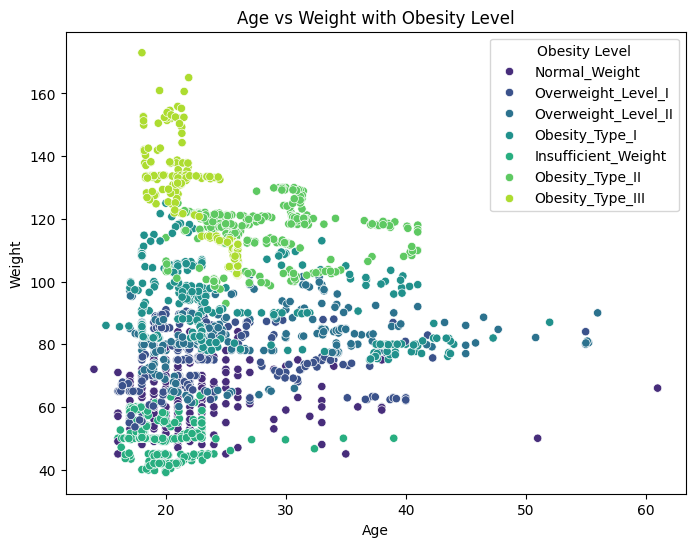

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=dataset["Age"], y=dataset["Weight"], hue=dataset.iloc[:, -1], palette="viridis")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.title("Age vs Weight with Obesity Level")
plt.legend(title="Obesity Level")
plt.show()


In [ ]:
print(x_train[:15])

[[1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0
  -0.4746160179308014 1.747987 2.329350515378631 3.0 3.0 2 2.336349
  1.4164 0.711724 2]
 [1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0
  -0.36715170029909217 1.5 -1.4546508035779222 2.0 1.0 2 2.0 3.0 0.0 3]
 [0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0
  -0.33734954123893 1.784555 0.11739489501940194 1.979944 1.599464 2 2.0
  0.17048 0.819475 2]
 [1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0
  -0.14814844330797186 1.744319 1.796424813426843 3.0 3.0 2 2.839069
  1.231031 0.792496 2]
 [0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0
  1.5179194106223546 1.701387 0.779090461754604 2.561638 2.87747 2 1.0
  1.980401 0.0 3]
 [0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0
  -0.20671457277609465 1.67 -0.04955001826450036 2.0 3.0 0 2.0 0.0 1.0 3]
 [0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0
  0.07429282088883836 1.735343 -0.13278892020879401 2.6

##Model Training Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)
#Encoded prediction results
print(np.concatenate((y_pred.reshape(len(y_pred), 1),
                      y_test.reshape(len(y_test), 1)), 1))


[[3 3]
 [2 2]
 [5 5]
 ...
 [2 2]
 [4 4]
 [3 3]]


##Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[74  4  0  0  0  0  0]
 [ 1 67  0  0  0  1  0]
 [ 0  0 85  0  0  1  0]
 [ 0  0  0 73  0  0  0]
 [ 0  0  0  0 88  0  0]
 [ 0 11  1  0  0 53  3]
 [ 0  3  1  0  0  2 60]]


0.946969696969697

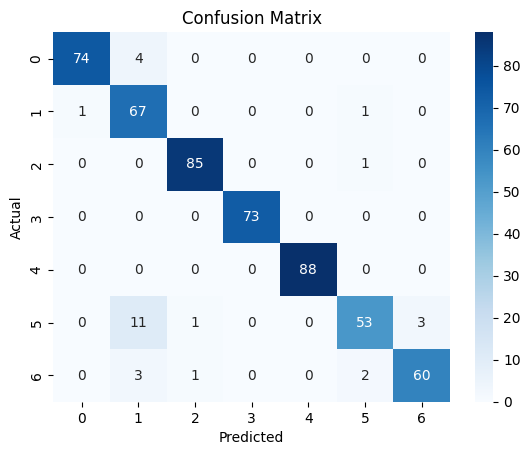

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


##Test Case Results

In [ ]:

y_pred = classifier.predict(x_test)
y_pred_original = le1.inverse_transform(y_pred)  # Decode predictions
y_test_original = le1.inverse_transform(y_test)  # Decode actual test labels
print("Decoded Test Labels:", y_test_original[:100])
print("Decoded Predictions:", y_pred_original[:100])
#Decoded predicted results
print(np.concatenate((y_pred_original.reshape(len(y_pred_original), 1),
                      y_test_original.reshape(len(y_test_original), 1)), 1))


Decoded Test Labels: ['Obesity_Type_II' 'Obesity_Type_I' 'Overweight_Level_I'
 'Obesity_Type_III' 'Obesity_Type_III' 'Obesity_Type_II'
 'Insufficient_Weight' 'Obesity_Type_III' 'Obesity_Type_I'
 'Obesity_Type_II' 'Obesity_Type_III' 'Obesity_Type_I'
 'Overweight_Level_I' 'Obesity_Type_I' 'Normal_Weight' 'Obesity_Type_I'
 'Normal_Weight' 'Obesity_Type_III' 'Overweight_Level_II'
 'Overweight_Level_II' 'Obesity_Type_III' 'Obesity_Type_I'
 'Obesity_Type_I' 'Overweight_Level_II' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_II' 'Overweight_Level_I'
 'Obesity_Type_II' 'Overweight_Level_I' 'Overweight_Level_II'
 'Overweight_Level_II' 'Obesity_Type_I' 'Obesity_Type_II'
 'Overweight_Level_I' 'Overweight_Level_II' 'Insufficient_Weight'
 'Overweight_Level_I' 'Insufficient_Weight' 'Overweight_Level_I'
 'Overweight_Level_II' 'Insufficient_Weight' 'Overweight_Level_I'
 'Obesity_Type_III' 'Obesity_Type_II' 'Obesity_Type_I'
 'Insufficient_Weight' 'Obesity_Type_III' 'Insuffici

In [ ]:
'''mapping = {i: label for i, label in enumerate(le1.classes_)}
decoded_values = [mapping[val] for val in y]
print(type(decoded_values))

print("Decoded values:", decoded_values[:15])'''

'mapping = {i: label for i, label in enumerate(le1.classes_)}\ndecoded_values = [mapping[val] for val in y]\nprint(type(decoded_values))\n\nprint("Decoded values:", decoded_values[:15])'

##New Test Case Prediction

In [ ]:
case1=["Male",22,1.7,60,"no","yes",1,2,"Sometimes","no",4,'no',1,0,"Sometimes","Motorbike"]
case1_encoded= ct1.transform([case1])
case1_encoded[:,-1]=le.transform(case1_encoded[:,-1])
case1_encoded[:,-5]=le.transform(case1_encoded[:,-5])
case1_encoded[:, [15,17]] = st.transform(case1_encoded[:, [15,17]])

case_pred= classifier.predict(case1_encoded)
decoded_case_pred= le1.inverse_transform(case_pred)
print("Obesity Prediction: ", decoded_case_pred[0])



Obesity Prediction:  Normal_Weight


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        78
           1       0.79      0.97      0.87        69
           2       0.98      0.99      0.98        86
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00        88
           5       0.93      0.78      0.85        68
           6       0.95      0.91      0.93        66

    accuracy                           0.95       528
   macro avg       0.95      0.94      0.94       528
weighted avg       0.95      0.95      0.95       528

